In [34]:
%matplotlib inline
import numpy as np
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

matplotlib.rcParams['font.size'] = 22

In [31]:
cancer = load_breast_cancer()

In [13]:
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [14]:
print("Shape: \n{}".format(cancer.data.shape))

Shape: 
(569, 30)


In [15]:
print("Sample counts per class: \n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [16]:
print("Feature names: \n{}".format(cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
# stratify on class label since random sample may not sufficiently sample all classes

In [23]:
training_acc = []
test_acc = []
neighbors_settings = range(1,11)

In [28]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_acc.append(clf.score(X_train,y_train))
    test_acc.append(clf.score(X_test,y_test))

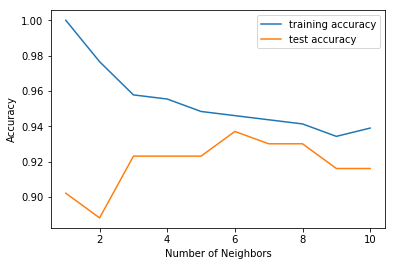

In [29]:
plt.plot(neighbors_settings, training_acc, label="training accuracy")
plt.plot(neighbors_settings, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.legend()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training: {:.3f} and test: {:.3f}".format(logreg.score(X_train,y_train), logreg.score(X_test,y_test)))

Training: 0.955 and test: 0.958


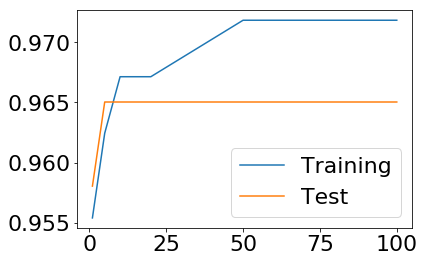

In [49]:
C_params = [1,5,10,20,50,100]
#low C, higher
train_acc, test_acc = [], []

for i in C_params:
    logreg = LogisticRegression(C=i).fit(X_train,y_train)
    train_acc.append(logreg.score(X_train,y_train))
    test_acc.append(logreg.score(X_test,y_test))

plt.plot(C_params,train_acc,label="Training")
plt.plot(C_params,test_acc,label="Test")
plt.legend()